Box-cox

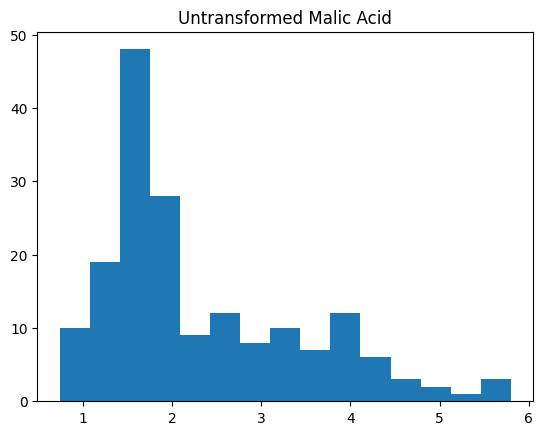

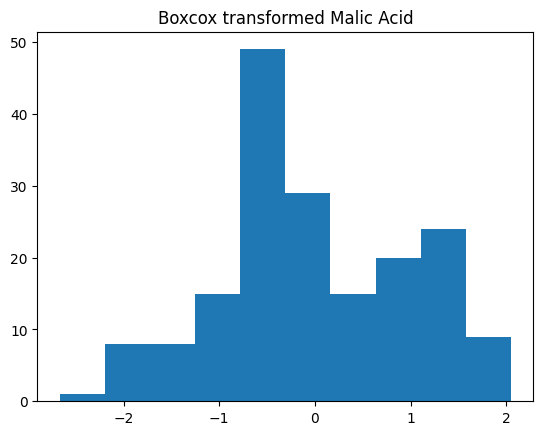

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets

# load dataset -----------------------
X = pd.DataFrame(datasets.load_wine().data)
X.columns = datasets.load_wine().feature_names
X.head(5)
y = datasets.load_wine().target_names
plt.hist(X.malic_acid, bins=15)
plt.title('Untransformed Malic Acid')
plt.show()

# perform transform -----------------------
from sklearn.preprocessing import PowerTransformer

# Instantiate PowerTransformer (choose which transform)
pow_trans = PowerTransformer(method="box-cox")
# pow_trans = PowerTransformer(method="yeo-johnson")        # use yeo-johnson if data has negative values

column_to_transform = X[['malic_acid']]                     # column_to_transform is the target. Need [[ ]] to prevent error
pow_trans.fit(column_to_transform)                          # Train the transform on the data
X['malic_acid_bc_transform'] = pow_trans.transform(column_to_transform) # Apply the power transform to the data

plt.hist(X['malic_acid_bc_transform'])
plt.title('Boxcox transformed Malic Acid')
plt.show()

StandardScaler

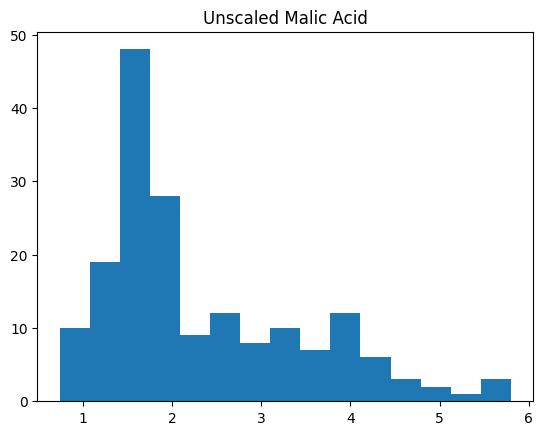

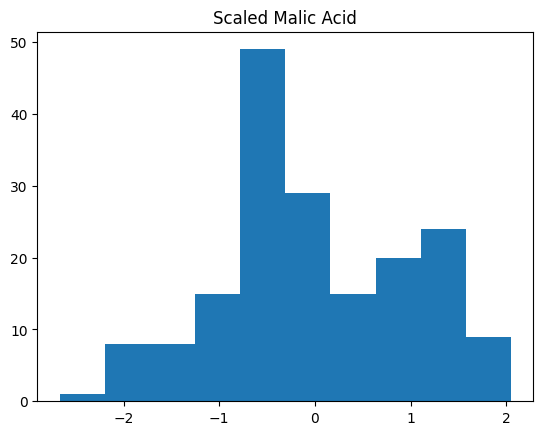

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

plt.hist(df.malic_acid, bins=15)
plt.title('Unscaled Malic Acid')
plt.show()

# perform transform -----------------------
scaler=StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X))
X_standardized.columns=X.columns
X_standardized.index=X.index


plt.hist(df['malic_acid_bc_transform'])
plt.title('Scaled Malic Acid')
plt.show()

NN normalize layer

In [ ]:
# code excerpt - this does not run

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.layers.experimental import preprocessing

#setup normalizer
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(X))

number_of_inputs= X.shape[1]

print(f"in={number_of_inputs)

nn_model = keras.Sequential([normalizer,
                          layers.Dense(10, activation='relu', input_dim=number_of_inputs),
                          layers.Dense(10, activation='relu'),
                          layers.Dense(1, activation='linear') ])